In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

games_data = pd.read_csv("videogames/vgsales.csv")
games_data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [9]:
#How many games are there in total?
len(games_data.Name.unique())

11493

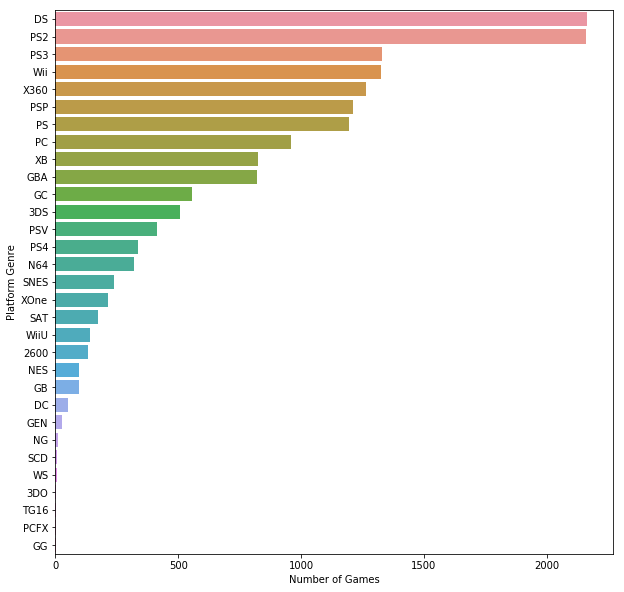

In [3]:
#Relationship between platform and genre
platGenre = pd.crosstab(games_data.Platform, games_data.Genre)
platGenreTotal = platGenre.sum(axis=1).sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=platGenreTotal.index, x=platGenreTotal.values, orient='h')
plt.ylabel("Platform Genre")
plt.xlabel("Number of Games")
plt.show()

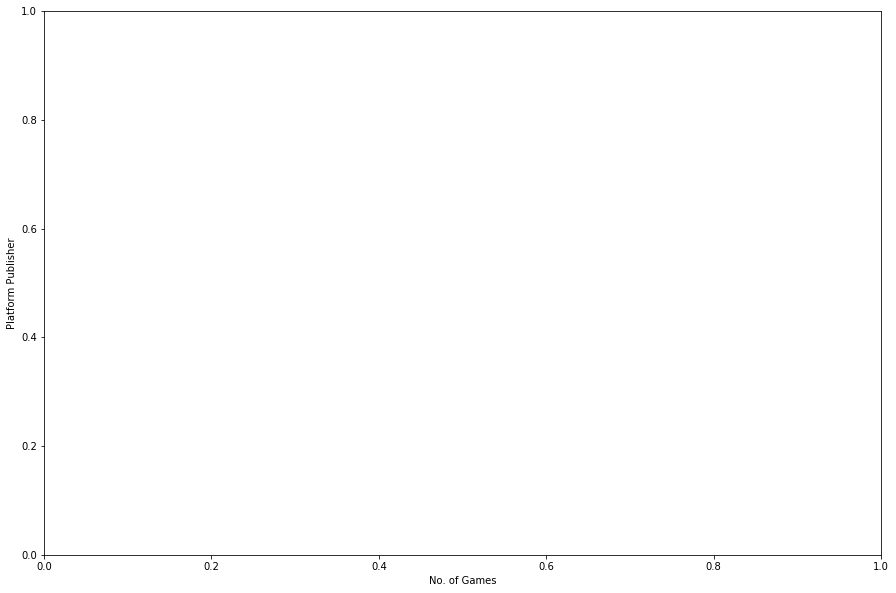

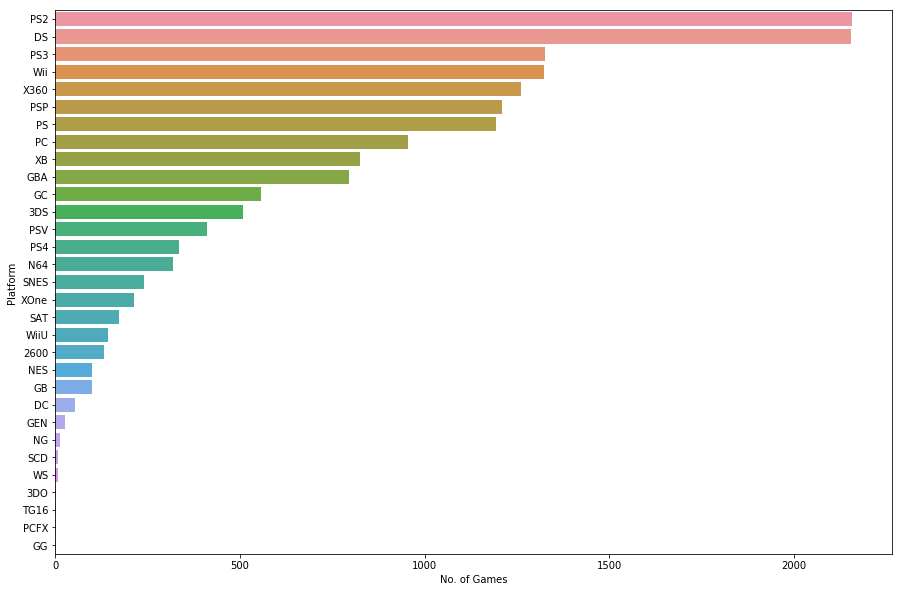

In [12]:
platPublisher = pd.crosstab(games_data.Platform, games_data.Publisher)
platPublisherTotal = platPublisher.sum(axis=1).sort_values(ascending=False)
plt.figure(figsize=(15,10))
plt.xlabel("No. of Games")
plt.ylabel("Platform Publisher")
sns.barplot(y=platPublisherTotal.index,x=platPublisherTotal.values,orient='h')
plt.show()

In [5]:
platGenre['Total'] = platGenre.sum(axis=1)
popPlatform = platGenre[platGenre['Total']>1000].sort_values(by='Total',ascending=False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(),columns=['total']).T,ignore_index=False)
sns.set(font_scale=1.0)
plt.figure(figsize=(10,10))
sns.heatmap(popPlatformfinal,vmin=mini,vmax=maxi,annot=True,fmt="d")
plt.xticks(rotation=90)
plt.show()